## Based on a dataset with house information, calculate the optimal strategy for home pricing according to a linear regression model

## Import Libraries

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from pylab import *


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


<font color=darkblue>
    
# Loading and exploring the data


In [2]:
data = pd.read_excel("File")

In [3]:
data.shape #The File has 365 Rows with Data AND 3 Columns

(100, 19)

In [4]:
len(data) # confirm the number of rows

100

In [5]:
data.columns #The Columns names are described below. Names are very long but will remain for this exercise.

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition'],
      dtype='object')

In [6]:
data.dtypes.value_counts() # Data are all numerical

int64      14
float64     4
object      1
dtype: int64

In [7]:
data.head(10) #Visually check the first 10 Rows

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition
0,7129300520,221900,3,1.00,1180,5650,1.0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,538000,3,2.25,2570,7242,2.0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,180000,2,1.00,770,10000,1.0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average
3,2487200875,604000,4,3.00,1960,5000,1.0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Very Good
4,1954400510,510000,3,2.00,1680,8080,1.0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Average
5,7237550310,1225000,4,4.50,5420,101930,1.0,0,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Average
6,1321400060,257500,3,2.25,1715,6819,2.0,0,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Average
7,2008000270,291850,3,1.50,1060,9711,1.0,0,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Average
8,2414600126,229500,3,1.00,1780,7470,1.0,0,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Average
9,3793500160,323000,3,2.50,1890,6560,2.0,0,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Average


In [8]:
data.info()
# Check the characteristics of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   price          100 non-null    int64  
 2   bedrooms       100 non-null    int64  
 3   bathrooms      100 non-null    float64
 4   sqft_living    100 non-null    int64  
 5   sqft_lot       100 non-null    int64  
 6   floors         100 non-null    float64
 7   waterfront     100 non-null    int64  
 8   grade          100 non-null    int64  
 9   sqft_above     100 non-null    int64  
 10  sqft_basement  100 non-null    int64  
 11  yr_built       100 non-null    int64  
 12  yr_renovated   100 non-null    int64  
 13  zipcode        100 non-null    int64  
 14  lat            100 non-null    float64
 15  long           100 non-null    float64
 16  sqft_living15  100 non-null    int64  
 17  sqft_lot15     100 non-null    int64  
 18  condition  

In [9]:
data.isnull().sum() 
#no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition        0
dtype: int64

In [10]:
data.condition.value_counts()

Average      62
Good         26
Very Good    10
Fair          1
Poor          1
Name: condition, dtype: int64

In [11]:
data.describe() 
#These are the statistical values for numerical columns. 
# We can see the mean,standard deviation, minimum, maximum as well as first, second and third quantiles.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.691356e+09,5.191493e+05,3.400000,1.995000,2088.720000,11732.500000,1.470000,0.01,7.61000,1764.690000,324.030000,1966.87000,59.840000,98075.660000,47.539730,-122.229630,1965.120000,12005.520000
std,2.932563e+09,3.045017e+05,0.791368,0.727334,860.531878,14800.078903,0.511583,0.10,1.04345,724.395125,470.088375,28.47457,341.980025,52.286936,0.143779,0.136926,710.925081,18670.028538
min,1.600040e+07,1.530000e+05,2.000000,1.000000,770.000000,1044.000000,1.000000,0.00,5.00000,765.000000,0.000000,1900.00000,0.000000,98001.000000,47.289700,-122.451000,890.000000,1106.000000
25%,1.934675e+09,3.080000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.00,7.00000,1175.000000,0.000000,1948.00000,0.000000,98031.500000,47.408150,-122.341500,1440.000000,4995.000000
50%,4.102401e+09,4.337500e+05,3.000000,2.000000,1930.000000,6769.500000,1.500000,0.00,7.00000,1660.000000,0.000000,1967.50000,0.000000,98059.000000,47.573050,-122.267000,1790.000000,6935.000000
75%,7.362925e+09,6.531250e+05,4.000000,2.500000,2570.000000,9881.500000,2.000000,0.00,8.00000,2297.500000,625.000000,1991.25000,0.000000,98117.000000,47.670050,-122.148000,2395.000000,9398.000000
max,9.822700e+09,2.000000e+06,5.000000,4.500000,5420.000000,101930.000000,3.000000,1.00,11.00000,3890.000000,1700.000000,2014.00000,2002.000000,98199.000000,47.755800,-121.714000,4760.000000,135036.000000


In [12]:
df = data.copy()

In [13]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition'],
      dtype='object')

### Correlation Matrix

The Matrix shows how much two variables works towards the same goal, a positive correlation shows if one increases the other will increase too. 
Negative correlation would be the opposite, if one variable increases, the other will decrease.
The values/numerical number show the proportion of this relation, if the correlation is one, the variables are perfect correlated, an increase of one point in one variable will result in the same increase for the second variable.
Correlation above 0.5 or below -0.5 are statistically relevant, otherwise they do not have a high effect. 

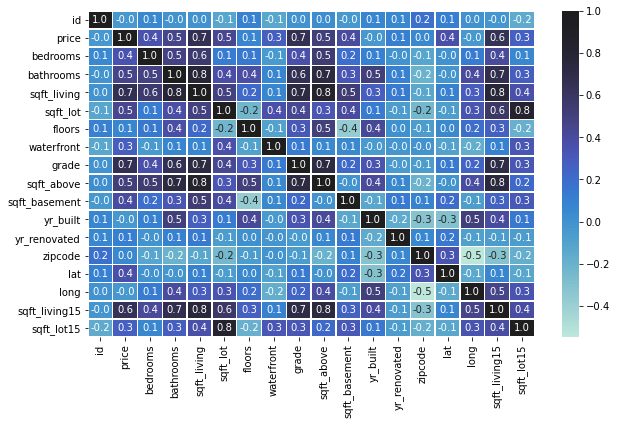

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Distribution Plot

<AxesSubplot:title={'center':'Property prices'}, xlabel='price', ylabel='Density'>

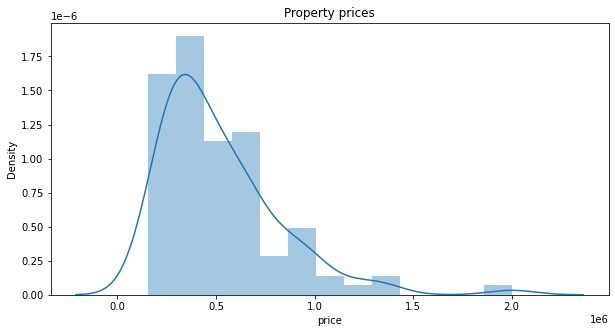

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Property prices')
sns.distplot(df['price'])

<AxesSubplot:title={'center':'Property Size'}, xlabel='sqft_living', ylabel='Density'>

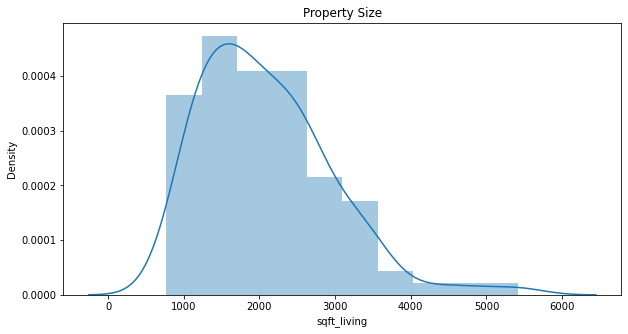

In [16]:
plt.figure(figsize=(10, 5))
plt.title('Property Size')
sns.distplot(df['sqft_living'])

<AxesSubplot:title={'center':'Grade'}, xlabel='grade', ylabel='Density'>

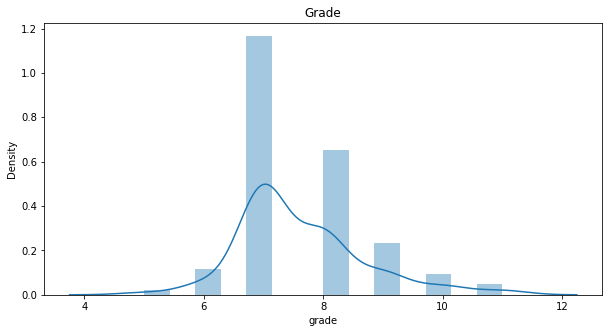

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Grade')
sns.distplot(df['grade'])

### Scatterplot

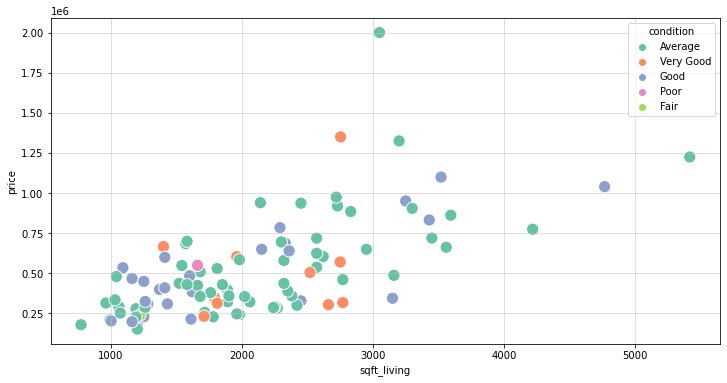

In [18]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="sqft_living", y="price", data=df, hue=df['condition'], palette="Set2", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.show()

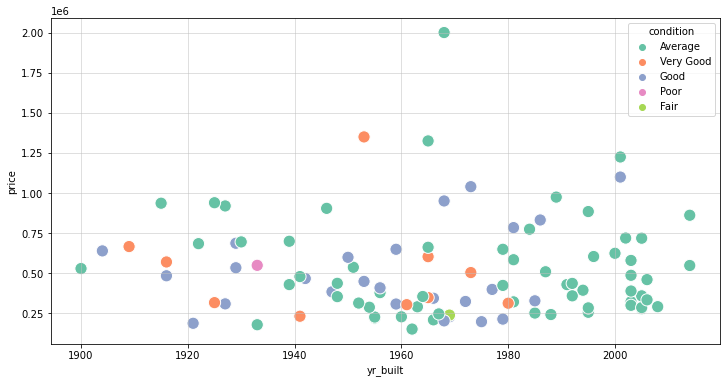

In [19]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="yr_built", y="price", data=df, hue=df['condition'], palette="Set2", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.show()

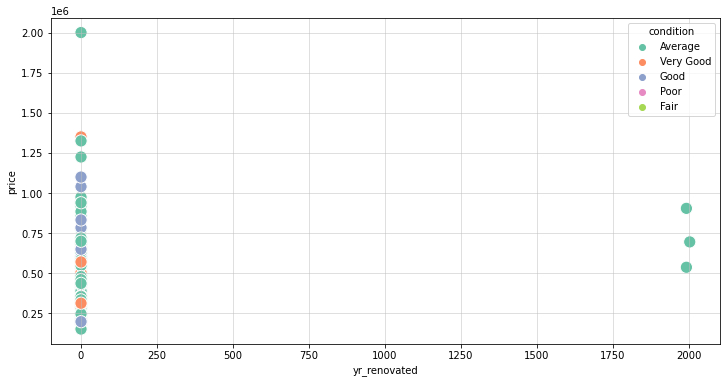

In [20]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="yr_renovated", y="price", data=df, hue=df['condition'], palette="Set2", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.show()

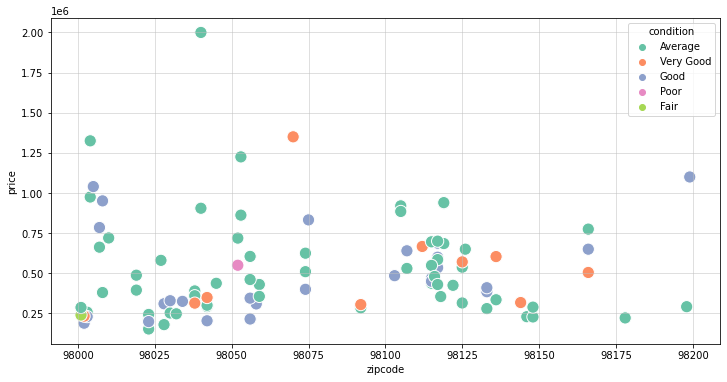

In [21]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="zipcode", y="price", data=df, hue=df['condition'], palette="Set2", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.show()

### Boxplot

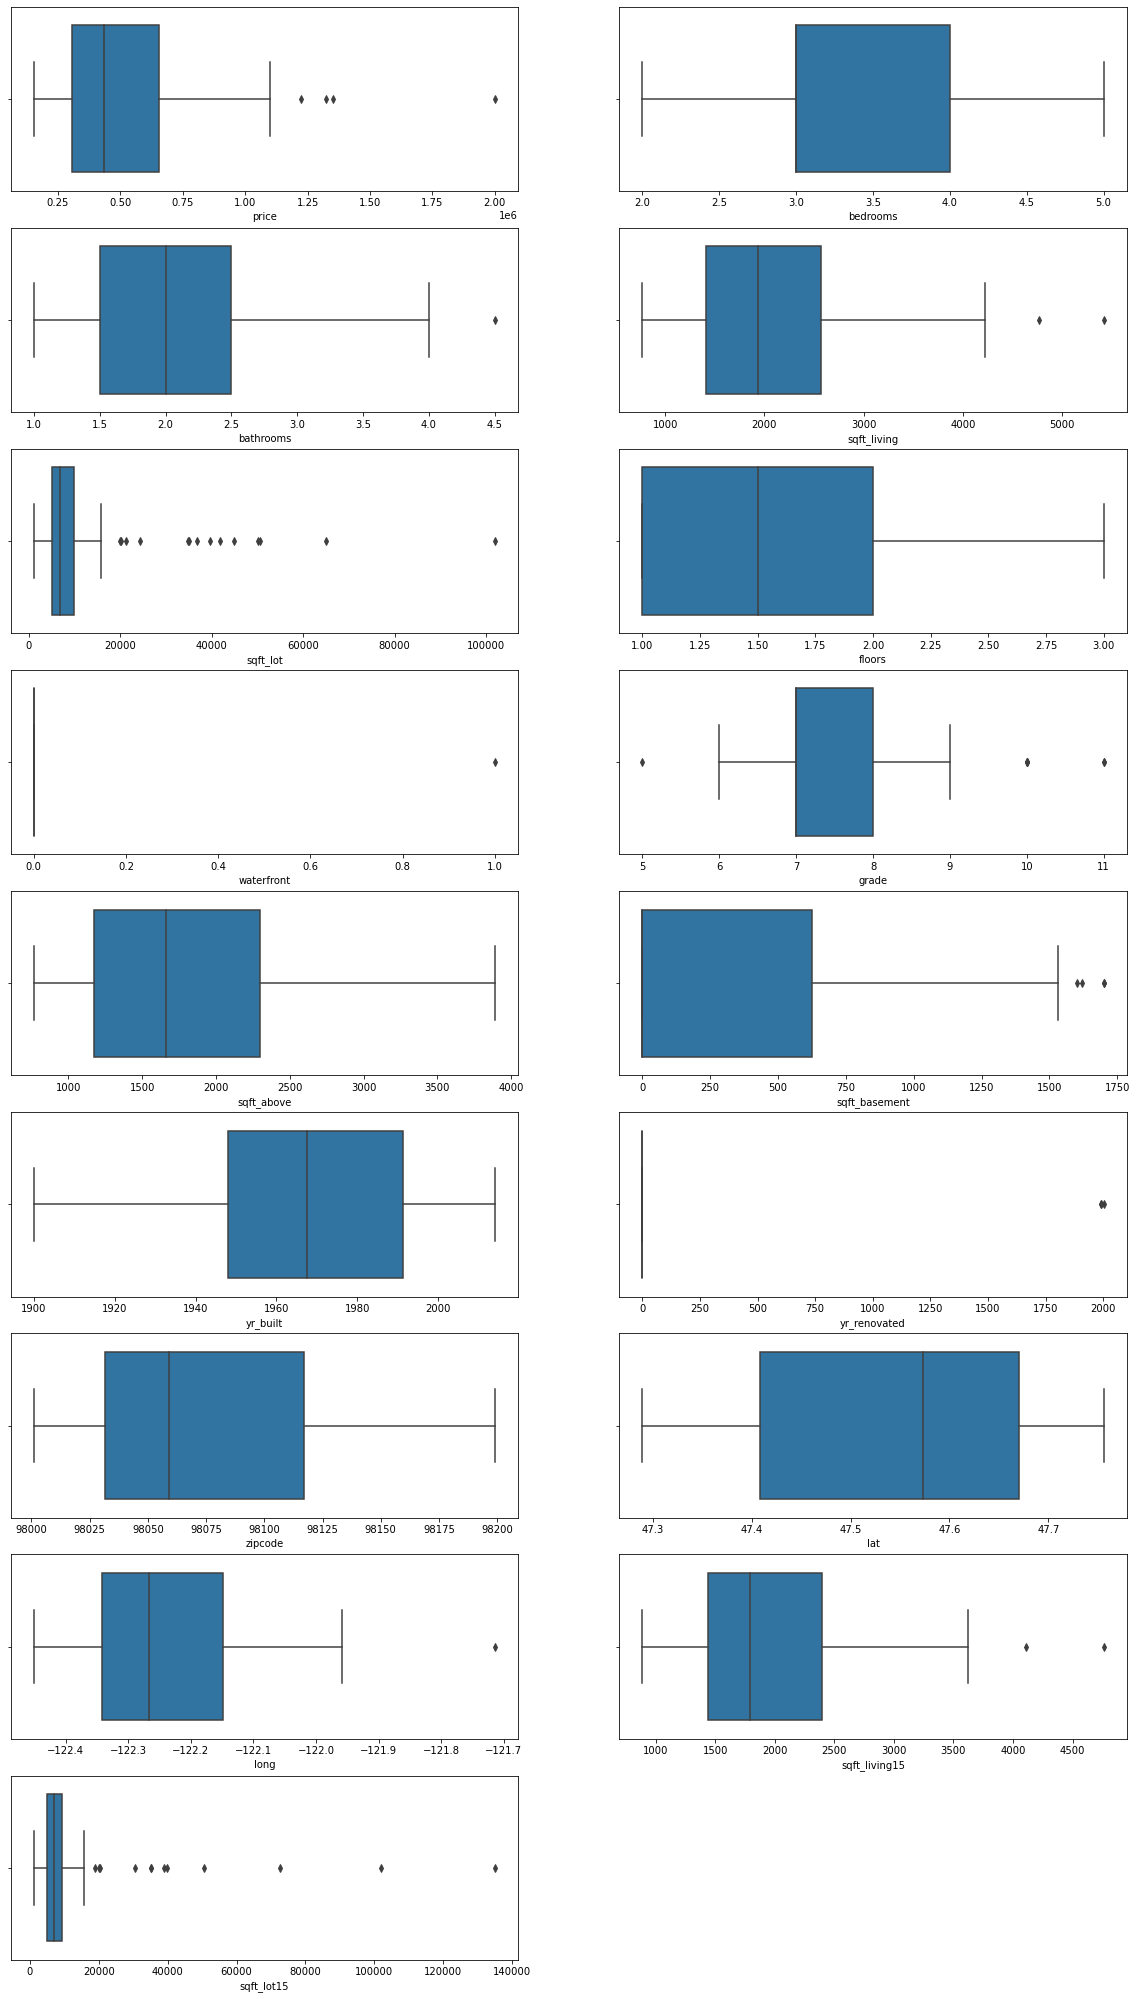

In [22]:
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("id") #Variable Rank does not give any information as it is a classification value.
plt.figure(figsize=(20, 40))

for i in range(len(all_col)):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df[all_col[i]]) 
 
plt.show()

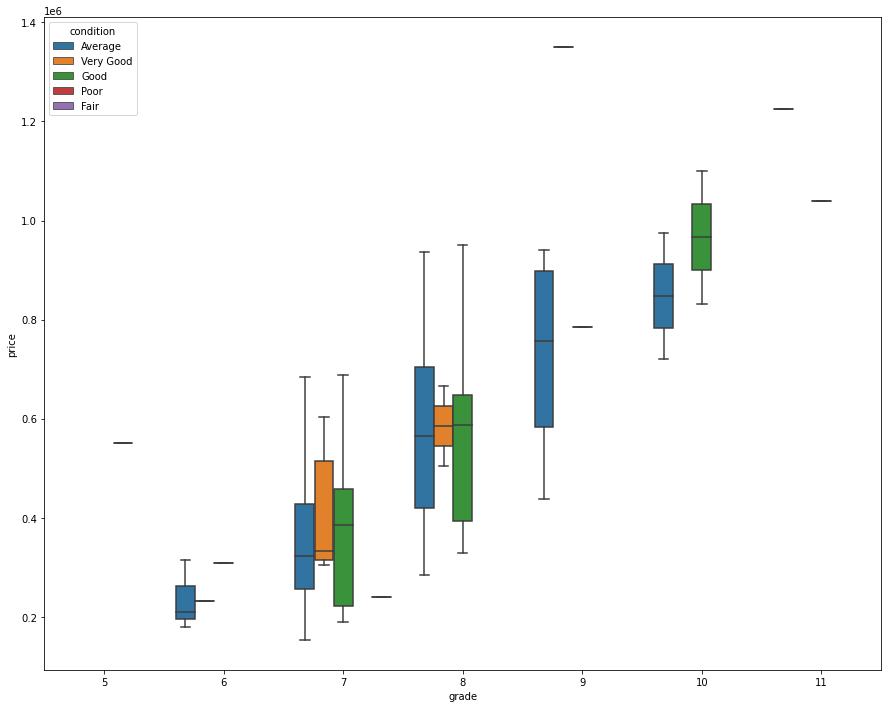

In [23]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="price", x="grade", data=data,hue='condition',showfliers=False);

# Linear Regression Model

In [24]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition'],
      dtype='object')

In [25]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
#Drop all the columns with categorical variables
a = df[['sqft_living','sqft_basement']]
# the dependent variable (the one where I want to check the relations)
b = df[['price']]

In [27]:
import statsmodels.api as sm

# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(a)

linearmodel = sm.OLS(b, a).fit()

print_model = linearmodel.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              284.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    1.45e-41
Time:                        03:24:46   Log-Likelihood:                         -1376.6
No. Observations:                 100   AIC:                                      2757.
Df Residuals:                      98   BIC:                                      2762.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### 

In [28]:
#Drop all the columns with categorical variables
X = df.drop(['price','id', 'bedrooms', 'bathrooms', 'floors', 'waterfront','sqft_above', 'sqft_basement',
       'sqft_lot','yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition'], axis=1)
# the dependent variable (the one where I want to check the relations)
y = df[['price']]

In [29]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [30]:
#Fit a LINEAR Regression
regression_model = LinearRegression()
lr = regression_model.fit(X_train, y_train)

In [31]:
print('R^2 of training set is ',regression_model.score(X_train, y_train))

R^2 of training set is  0.5833019276643485


In [32]:
print('R^2 of test set is',regression_model.score(X_test, y_test))

R^2 of test set is 0.49278658819431487


In [33]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for sqft_living is 104.67283664365404
The coefficient for grade is 175902.12776517466
The coefficient for yr_built is -2577.1920821126114
The coefficient for zipcode is 274.8123205168231


In [34]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -22920297.635509375


In [35]:
X_train.shape

(50, 4)

In [36]:
va = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Feature'] = X_train.columns
coeff_data['Coefs'] = regression_model.coef_[0]

coeff_data = coeff_data.append({'Feature': "Intercept", 'Coefs': regression_model.intercept_}, ignore_index = True)
coeff_data

,Feature,Coefs
0,sqft_living,104.673
1,grade,175902
2,yr_built,-2577.19
3,zipcode,274.812
4,Intercept,[-22920297.635509375]


In [37]:
#### Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 5):
    if(i!=4):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( 104.67283664365404 ) * sqft_living +  ( 175902.12776517466 ) * grade +  ( -2577.1920821126114 ) * yr_built +  ( 274.8123205168231 ) * zipcode +  [-22920297.63550938]


In [38]:
import statsmodels.api as sm

# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X_train)

linearmodel = sm.OLS(y_train, X_train).fit()

print_model = linearmodel.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              86.13
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    9.20e-21
Time:                        03:24:46   Log-Likelihood:                         -686.98
No. Observations:                  50   AIC:                                      1382.
Df Residuals:                      46   BIC:                                      1390.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------